<a href="https://colab.research.google.com/github/MPGarg/Assignment-12/blob/main/Assignment12_YoloV3_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MPGarg/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 411 (delta 9), reused 36 (delta 6), pack-reused 367
Receiving objects: 100% (411/411), 15.87 MiB | 25.00 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
#!pip3 install torch==1.10.0 torchvision torchaudio torchtext

In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [5]:
ls

gdrive/  sample_data/  YoloV3/


In [6]:
cd YoloV3/

/content/YoloV3


In [7]:
!ls

 cfg	     README.md	       test.py		  utils
 data	     results.json      ting		  vim.exe.stackdump
 detect.py   results.png       train_batch0.png
 models.py   results.txt       train.py
 output      test_batch0.png  'ubdivisions=1'


In [8]:
# Loading YoloV3 Weights
!cp -r /content/gdrive/MyDrive/YoloV3/weights /content/YoloV3/

In [9]:
!ls

 cfg	     README.md	       test.py		  utils
 data	     results.json      ting		  vim.exe.stackdump
 detect.py   results.png       train_batch0.png   weights
 models.py   results.txt       train.py
 output      test_batch0.png  'ubdivisions=1'


In [10]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(epochs=3, batch_size=3, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-25 17:03:51.378386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 17:03:52.461288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; 

In [11]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(epochs=300, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-25 17:04:39.589483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 17:04:40.596052: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or direc

In [12]:
!python detect.py --conf-thres 0.3 --output out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/100 data/customdata/images/Ratatouille1.jpg: 512x384 1 Alfredos, 1 Remys, Done. (0.038s)
image 2/100 data/customdata/images/Ratatouille10.jpg: 320x512 1 Alfredos, 1 Remys, Done. (0.032s)
image 3/100 data/cust

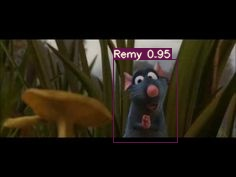

In [15]:
Image(filename='out_out/Ratatouille44.jpg', width=600)

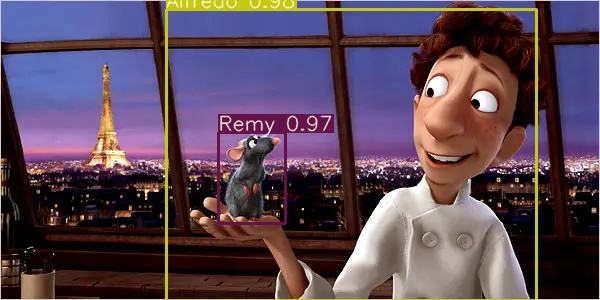

In [18]:
Image(filename='out_out/Ratatouille9.jpg', width=600)

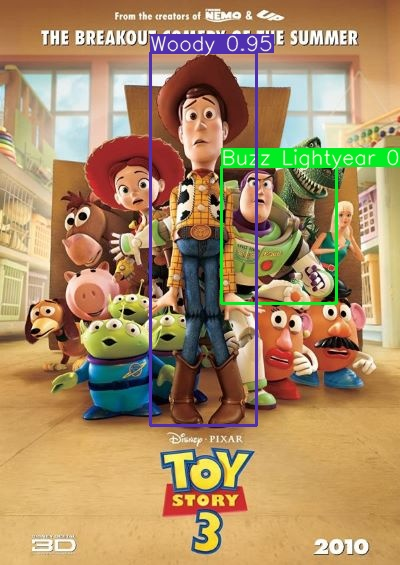

In [19]:
Image(filename='out_out/Woody13.jpg', width=600)

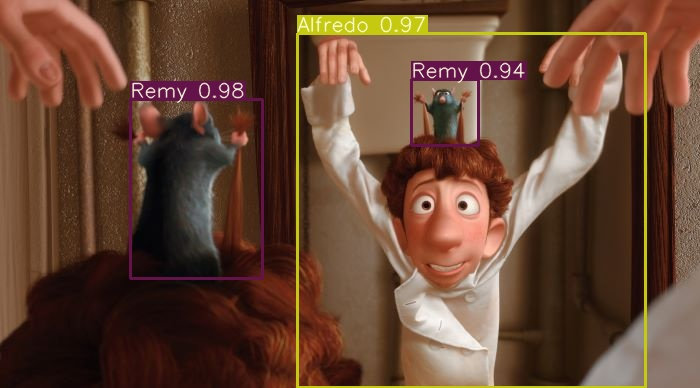

In [20]:
Image(filename='out_out/Ratatouille8.jpg', width=600)

In [13]:
# Copy the weights and output folders
!cp -r /content/YoloV3/weights /content/gdrive/MyDrive/Yolo_out1/weights_custom 

In [14]:
!cp -r /content/YoloV3/out_out /content/gdrive/MyDrive/Yolo_out1

In [24]:
# Loading video
!cp -r /content/gdrive/MyDrive/Yolo_vid /content/YoloV3/Yolo_vid1/

In [25]:
!python detect.py --conf-thres 0.3 --source /content/YoloV3/Yolo_vid1/ --output out_out2

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='/content/YoloV3/Yolo_vid1/', output='out_out2', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/559 /content/YoloV3/Yolo_vid1/image-1000.jpg: 320x512 1 Remys, Done. (0.032s)
image 2/559 /content/YoloV3/Yolo_vid1/image-1001.jpg: 320x512 1 Remys, Done. (0.032s)
image 3/559 /content/YoloV3/Yolo_vid1/i

In [26]:
!cp -r /content/YoloV3/out_out2 /content/gdrive/MyDrive/Yolo_out3